In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
from prophet import Prophet
from sklearn.model_selection import train_test_split

Importing plotly failed. Interactive plots will not work.


In [8]:
!pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/25/77/732831241003d9148913a2c101edd5ba23c3abeab8b8c511f0dd87afd786/prophet-1.1.5-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/e8/e2/2ddc273e726680a3c816f9a05c6726d57d61820fa7ab4753ed282d0a8bbe/cmdstanpy-1.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/2c/d8/0a6ae9402b5809135026ae6e8aa7802ad613429ffe13cc2727822f33a6b4/holidays-0.35-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/65/6e/09d8816b5cb7a4006ef8ad1717a2703ad9f331dae9717d9f22488a2d6469/importlib_resources-6.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for stanio~=0.3.0 from https://files.pythonhosted.org/packages/26/01/e2579afa3ad1eade8b5

In [6]:
!pip install -r requirements.txt

  Using cached eli5-0.13.0-py2.py3-none-any.whl
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/de/ce/b5d9c7ce1aaf9023b823c81932a50cd5e8f407198a696b0d1c6025a40b03/pandas-2.1.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached pandas-2.1.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
  Using cached seaborn-0.13.0-py3-none-any.whl.metadata (5.3 kB)
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/5b/13/fcabc86948f9e89b62a538670720f8589d63f93d3f4f3d172236a98e70f8/torch-2.1.0-cp311-cp311-manylinux1_x86_64.whl.metadata
  Using cached torch-2.1.0-cp311-cp311-manylinux1_x86_64.whl.metadata (25 kB)
  Obtaining dependency information for lightgbm from h

In [11]:
weather_filepath = "data/solar_weather.csv"

weather_df = pd.read_csv(weather_filepath, parse_dates = ['Time'])

display(weather_df)

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.00,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196771,2022-08-31 16:45:00,118,23.7,18.6,1023,57,3.8,0.0,0.0,52,1,780,825,0.95,3,16,8
196772,2022-08-31 17:00:00,82,15.6,18.5,1023,61,4.2,0.0,0.0,60,1,795,825,0.96,3,17,8
196773,2022-08-31 17:15:00,51,8.0,18.5,1023,61,4.2,0.0,0.0,60,1,810,825,0.98,3,17,8
196774,2022-08-31 17:30:00,24,2.1,18.5,1023,61,4.2,0.0,0.0,60,1,825,825,1.00,3,17,8


In [12]:
prophet_model = Prophet()

In [13]:
weather_prophet_df = weather_df[['Time', 'temp']].rename(columns = {'Time': 'ds', 'temp': 'y'})

In [14]:
display(weather_prophet_df)

,ds,y
0,2017-01-01 00:00:00,1.6
1,2017-01-01 00:15:00,1.6
2,2017-01-01 00:30:00,1.6
3,2017-01-01 00:45:00,1.6
4,2017-01-01 01:00:00,1.7
...,...,...
196771,2022-08-31 16:45:00,18.6
196772,2022-08-31 17:00:00,18.5
196773,2022-08-31 17:15:00,18.5
196774,2022-08-31 17:30:00,18.5


In [15]:
prophet_model.fit(weather_prophet_df)

00:50:01 - cmdstanpy - INFO - Chain [1] start processing
00:53:34 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
future = prophet_model.make_future_dataframe(periods = 365)
future.tail()

,ds
197136,2023-08-27 17:45:00
197137,2023-08-28 17:45:00
197138,2023-08-29 17:45:00
197139,2023-08-30 17:45:00
197140,2023-08-31 17:45:00


In [17]:
forecast = prophet_model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
197136,2023-08-27 17:45:00,10.275804,-6.496259,44.048719,-15.097980,34.065111,9.330142,9.330142,9.330142,1.440007,...,0.022317,0.022317,0.022317,7.867818,7.867818,7.867818,0.0,0.0,0.0,19.605945
197137,2023-08-28 17:45:00,10.276688,-7.029900,43.999521,-15.238147,34.165509,8.936224,8.936224,8.936224,1.440007,...,-0.224824,-0.224824,-0.224824,7.721041,7.721041,7.721041,0.0,0.0,0.0,19.212913
197138,2023-08-29 17:45:00,10.277573,-6.588600,44.675351,-15.455181,34.265908,8.918222,8.918222,8.918222,1.440007,...,-0.094903,-0.094903,-0.094903,7.573117,7.573117,7.573117,0.0,0.0,0.0,19.195795
197139,2023-08-30 17:45:00,10.278458,-6.294322,44.671950,-15.668636,34.366306,9.022372,9.022372,9.022372,1.440007,...,0.158974,0.158974,0.158974,7.423391,7.423391,7.423391,0.0,0.0,0.0,19.300829
197140,2023-08-31 17:45:00,10.279342,-7.119104,43.388367,-15.867051,34.466704,9.005746,9.005746,9.005746,1.440007,...,0.294511,0.294511,0.294511,7.271227,7.271227,7.271227,0.0,0.0,0.0,19.285088


/usr/local/lib/python3.11/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


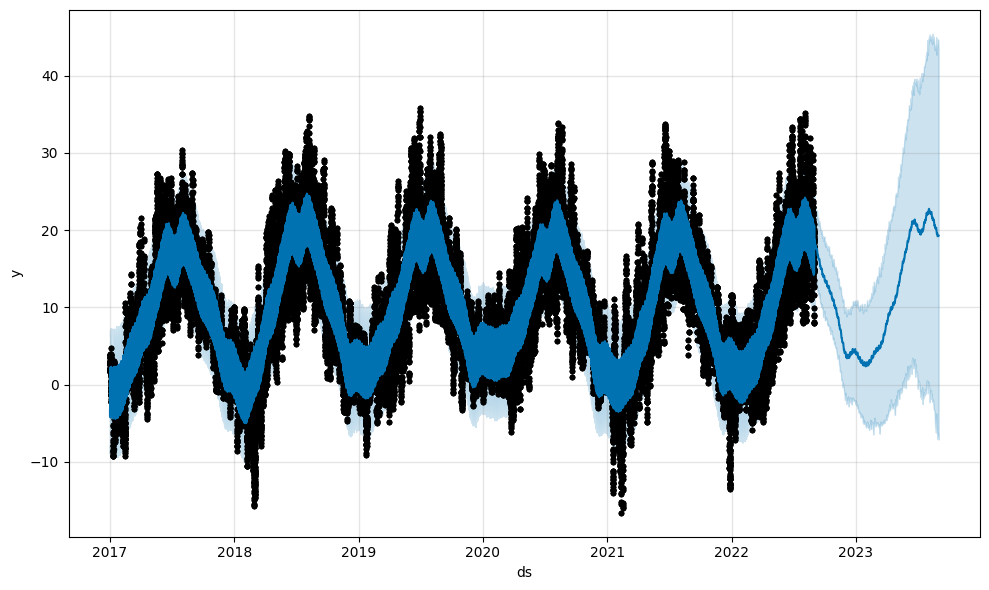

In [18]:
prophet_model.plot(forecast, uncertainty = True);

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.ar

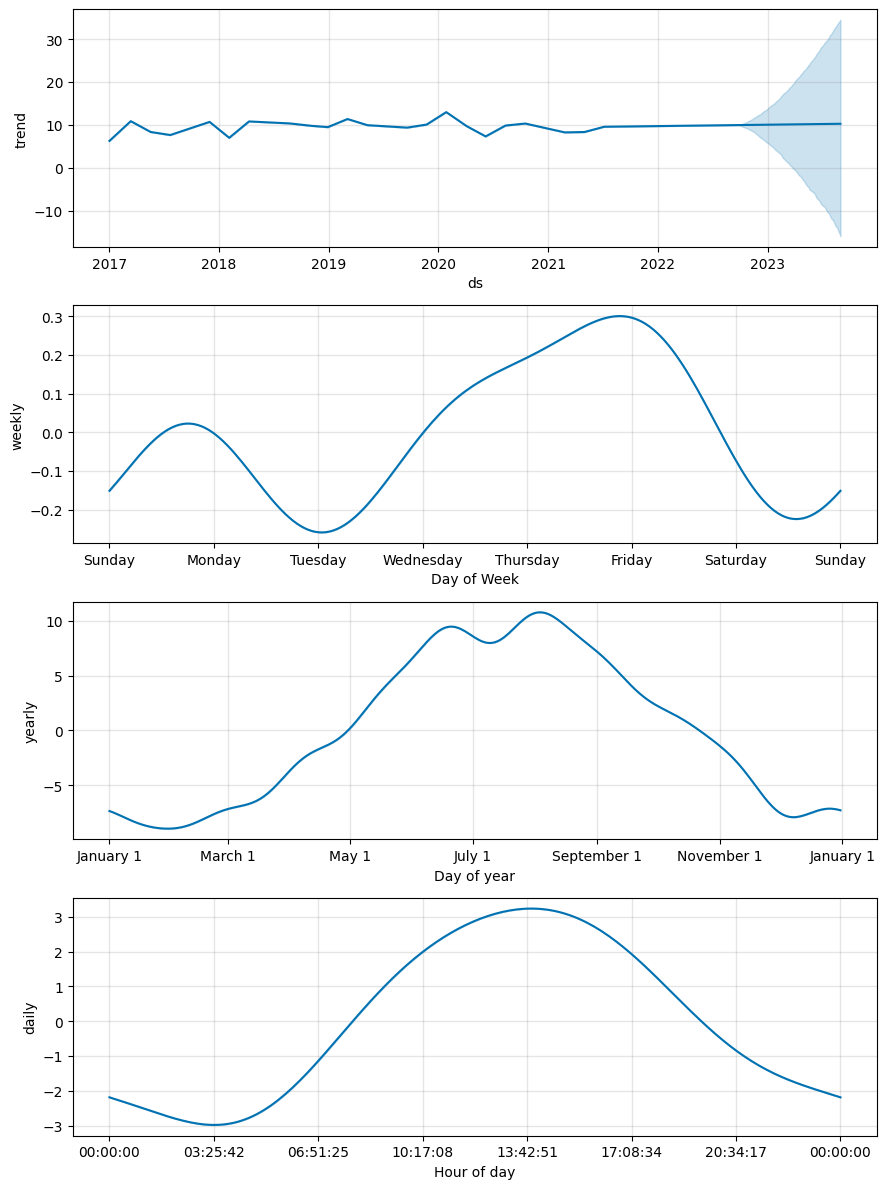

In [19]:
prophet_model.plot_components(forecast);

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.ar

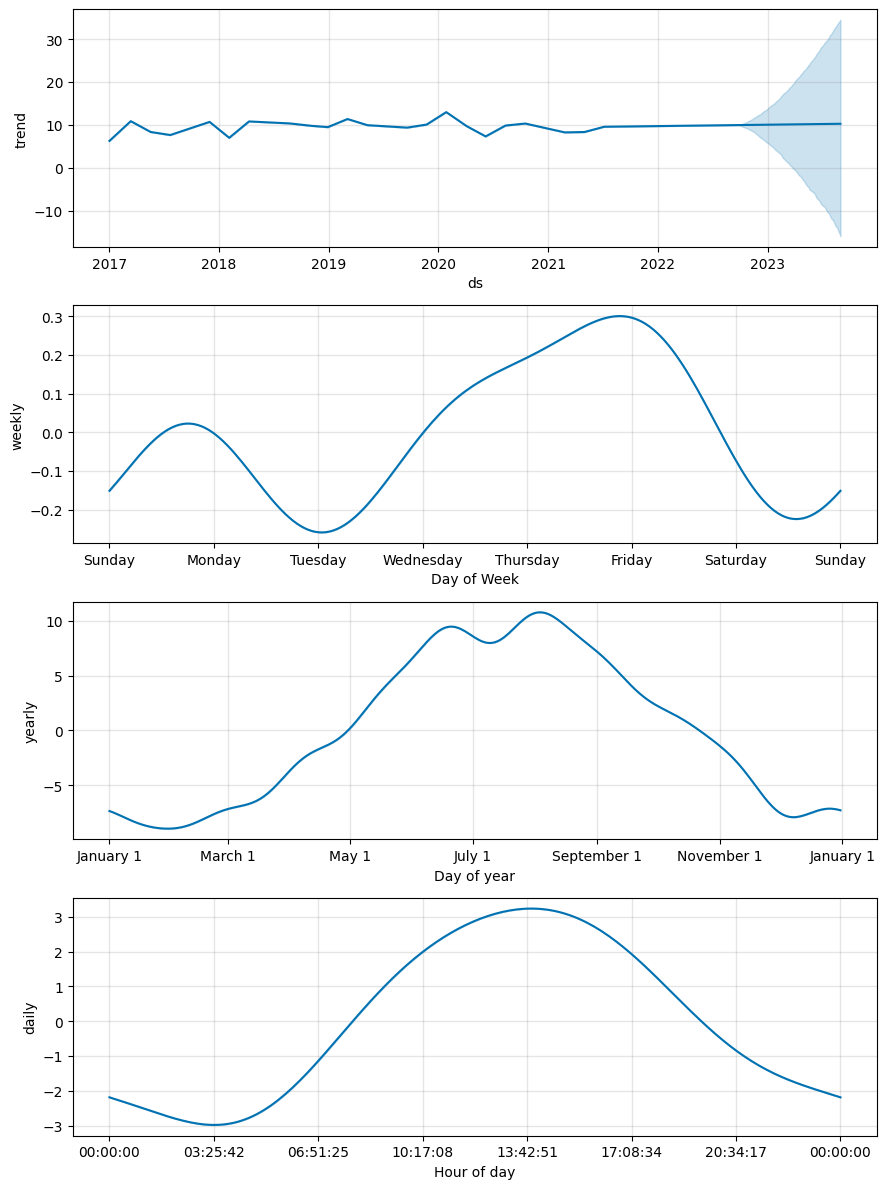

In [23]:
prophet_model.plot_components(forecast)

plt.show()